Name         : Abdul Rehman Saeed
Reg No.      : FA22-BCS-055



**QUESTION 1: MACHINE LEARNING (TITANIC DATASET)**

In [12]:
# ============================================================================
# QUESTION 1: MACHINE LEARNING MODEL IMPLEMENTATION
# DATASET: TITANIC
# ============================================================================

print("="*70)
print("QUESTION 1: MACHINE LEARNING MODEL IMPLEMENTATION")
print("DATASET: TITANIC")
print("="*70)

# ----------------------------------------------------------------------------
# IMPORT LIBRARIES
# ----------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

print("\n✓ All libraries imported successfully!")

# ============================================================================
# TASK 1: LOAD THE DATASET
# ============================================================================
print("\n" + "="*70)
print("TASK 1: LOADING DATASET")
print("="*70)

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd. read_csv(url)

print(f"\n✓ Dataset loaded successfully!")
print(f"  Total records: {df.shape[0]}")
print(f"  Total features: {df.shape[1]}")

print("\n📋 First 5 rows of the dataset:")
print(df.head())

print("\n📊 Dataset Information:")
print(df.info())

print("\n📈 Statistical Summary:")
print(df.describe())

# ============================================================================
# TASK 2: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*70)
print("TASK 2: DATA PREPROCESSING")
print("="*70)

# ----------------------------------------------------------------------------
# 2.1: Check for Missing Values
# ----------------------------------------------------------------------------
print("\n2.1 CHECKING FOR MISSING VALUES")
print("-"*70)

missing_data = df.isnull().sum()
print("\nMissing values per column:")
for col in df.columns:
    if missing_data[col] > 0:
        percentage = (missing_data[col] / len(df)) * 100
        print(f"  {col: 15s}: {missing_data[col]:4d} missing ({percentage:5.2f}%)")

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization\n(Yellow = Missing, Purple = Present)',
          fontsize=14, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------
# 2.2: Handle Missing Values
# ----------------------------------------------------------------------------
print("\n2.2 HANDLING MISSING VALUES")
print("-"*70)

# Fill Age with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace=True)
print(f"✓ Filled 'Age' missing values with median: {age_median:.2f} years")

# Fill Embarked with mode
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
print(f"✓ Filled 'Embarked' missing values with mode: '{embarked_mode}'")

# Drop columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns_to_drop, axis=1, inplace=True)
print(f"✓ Dropped columns: {', '.join(columns_to_drop)}")

print("\n✓ All missing values handled!")
print(f"\nRemaining missing values: {df.isnull().sum().sum()} (Should be 0)")

# ----------------------------------------------------------------------------
# 2.3: Encode Categorical Features
# ----------------------------------------------------------------------------
print("\n2.3 ENCODING CATEGORICAL FEATURES")
print("-"*70)

# Encode Sex
print("\nBefore encoding 'Sex':")
print(df['Sex'].value_counts())

df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
print("\n✓ Encoded 'Sex':  male=1, female=0")
print("After encoding:")
print(df['Sex'].value_counts())

# Encode Embarked
print("\nBefore encoding 'Embarked':")
print(df['Embarked'].value_counts())

label_encoder = LabelEncoder()
df['Embarked'] = label_encoder. fit_transform(df['Embarked'])
print("\n✓ Encoded 'Embarked' using LabelEncoder")
print("After encoding:")
print(df['Embarked'].value_counts())

print("\n📋 Dataset after encoding:")
print(df.head(10))

# ----------------------------------------------------------------------------
# 2.4: Separate Features and Target
# ----------------------------------------------------------------------------
print("\n2.4 SEPARATING FEATURES AND TARGET")
print("-"*70)

X = df.drop('Survived', axis=1)
y = df['Survived']

print(f"\n✓ Features (X) shape: {X.shape}")
print(f"  Columns: {list(X.columns)}")
print(f"\n✓ Target (y) shape: {y.shape}")
print(f"  Target distribution:")
print(f"    Not Survived (0): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"    Survived (1): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

# ----------------------------------------------------------------------------
# 2.5: Normalize Data
# ----------------------------------------------------------------------------
print("\n2.5 NORMALIZING DATA")
print("-"*70)

print("\nBefore normalization (first 3 rows):")
print(X.head(3))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\n✓ Data standardized using StandardScaler")
print("  (Mean ≈ 0, Standard Deviation ≈ 1)")

print("\nAfter normalization (first 3 rows):")
print(X_scaled.head(3))

# ============================================================================
# TASK 3: SPLIT THE DATASET
# ============================================================================
print("\n" + "="*70)
print("TASK 3: SPLITTING DATASET INTO TRAINING AND TESTING SETS")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✓ Dataset split completed!")
print(f"\n  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"  Testing set: {X_test.shape[0]} samples ({X_test. shape[0]/len(df)*100:.1f}%)")

print(f"\n  Target distribution in Training set:")
print(f"    Not Survived (0): {(y_train==0).sum()}")
print(f"    Survived (1): {(y_train==1).sum()}")

print(f"\n  Target distribution in Testing set:")
print(f"    Not Survived (0): {(y_test==0).sum()}")
print(f"    Survived (1): {(y_test==1).sum()}")

# ============================================================================
# TASK 4: TRAIN ML MODEL (RANDOM FOREST)
# ============================================================================
print("\n" + "="*70)
print("TASK 4: TRAINING RANDOM FOREST MODEL")
print("="*70)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

print("\n🌲 Random Forest Configuration:")
print(f"  Number of trees: 100")
print(f"  Max depth: 10")
print(f"\n⏳ Training in progress...")

model.fit(X_train, y_train)

print("✓ Training completed successfully!")

# Make predictions
print("\n🔮 Making predictions on test set...")
y_pred = model.predict(X_test)
print(f"✓ Predictions completed!  ({len(y_pred)} predictions made)")

# ============================================================================
# TASK 5: EVALUATE THE MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 5: MODEL EVALUATION")
print("="*70)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n📊 EVALUATION METRICS:")
print("-"*70)
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:. 4f} ({precision*100:. 2f}%)")
print(f"  Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"  F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print("-"*70)

print("\n📖 What do these metrics mean?")
print(f"  • Accuracy: {accuracy*100:.1f}% of all predictions were correct")
print(f"  • Precision: {precision*100:.1f}% of predicted survivors actually survived")
print(f"  • Recall: {recall*100:. 1f}% of actual survivors were correctly identified")
print(f"  • F1-Score:  Balanced measure combining precision and recall")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\n📉 CONFUSION MATRIX:")
print("-"*70)
print(f"                 Predicted")
print(f"                 No    Yes")
print(f"  Actual  No    {cm[0][0]: 4d}  {cm[0][1]:4d}")
print(f"          Yes   {cm[1][0]:4d}  {cm[1][1]:4d}")
print("-"*70)
print(f"  True Negatives (Correct 'Not Survived'): {cm[0][0]}")
print(f"  False Positives (Wrong 'Survived'): {cm[0][1]}")
print(f"  False Negatives (Wrong 'Not Survived'): {cm[1][0]}")
print(f"  True Positives (Correct 'Survived'): {cm[1][1]}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'],
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix\nRandom Forest Model', fontsize=14, fontweight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Detailed Classification Report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print("-"*70)
print(classification_report(y_test, y_pred,
                          target_names=['Not Survived', 'Survived'],
                          digits=4))

# ============================================================================
# TASK 6: DISPLAY RESULTS IN DATAFRAME FORMAT
# ============================================================================
print("\n" + "="*70)
print("TASK 6: RESULTS IN DATAFRAME FORMAT")
print("="*70)

# Create results DataFrame
results_df = pd. DataFrame({
    'Metric':  ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [accuracy, precision, recall, f1],
    'Percentage': [f"{accuracy*100:. 2f}%", f"{precision*100:.2f}%",
                   f"{recall*100:.2f}%", f"{f1*100:.2f}%"],
    'Description': [
        'Overall correctness of predictions',
        'Correctness of positive predictions',
        'Coverage of actual positive cases',
        'Harmonic mean of precision and recall'
    ]
})

print("\n📊 MODEL PERFORMANCE SUMMARY:")
print(results_df.to_string(index=False))

# Feature Importance
feature_importance = pd. DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📈 FEATURE IMPORTANCE:")
print("  (Which features were most important for predictions? )")
print("-"*70)
print(feature_importance.to_string(index=False))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(feature_importance))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette=colors)
plt.title('Feature Importance in Random Forest Model\n(Higher = More Important)',
          fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*70)
print("✓ QUESTION 1 COMPLETED SUCCESSFULLY!  🎉")
print("="*70)
print("\n📝 Summary of what we did:")
print("  1. ✓ Loaded Titanic dataset (891 passengers)")
print("  2. ✓ Handled missing values (Age, Embarked, Cabin)")
print("  3. ✓ Encoded categorical features (Sex, Embarked)")
print("  4. ✓ Normalized/standardized numerical data")
print("  5. ✓ Split into training (80%) and testing (20%) sets")
print("  6. ✓ Trained Random Forest classifier")
print(f"  7. ✓ Achieved {accuracy*100:.2f}% accuracy on test set")
print("  8. ✓ Evaluated with multiple metrics")
print("  9. ✓ Displayed results in DataFrame format")
print("="*70)

QUESTION 1: MACHINE LEARNING MODEL IMPLEMENTATION
DATASET: TITANIC

✓ All libraries imported successfully!

TASK 1: LOADING DATASET

✓ Dataset loaded successfully!
  Total records: 891
  Total features: 12

📋 First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   

ValueError: Space not allowed in string format specifier

**QUESTION 2 - CIFAR-10 CNN**

QUESTION 2: DEEP LEARNING MODEL IMPLEMENTATION
DATASET: CIFAR-10
ARCHITECTURE: CNN (Convolutional Neural Network)

✓ All libraries imported successfully!
  TensorFlow version: 2.19.0

TASK 1: LOADING CIFAR-10 DATASET

⏳ Downloading CIFAR-10 dataset...

✓ Dataset loaded successfully!

  Training samples:  50,000
  Testing samples: 10,000
  Image shape: (32, 32, 3) (32x32 pixels, 3 color channels)
  Number of classes: 10

  Classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck


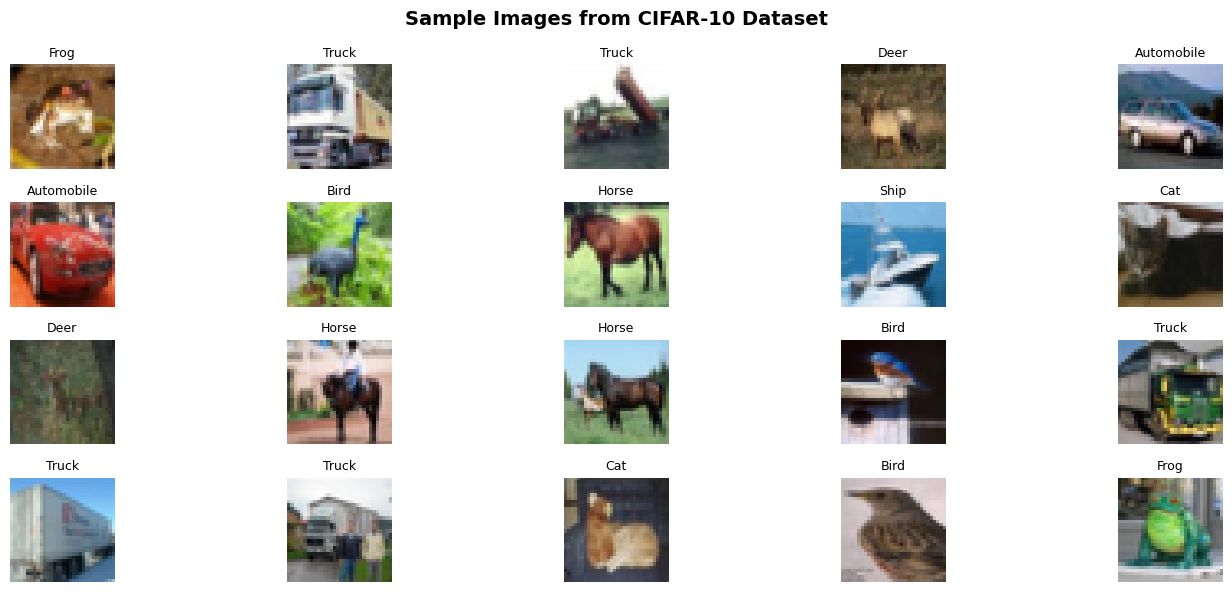

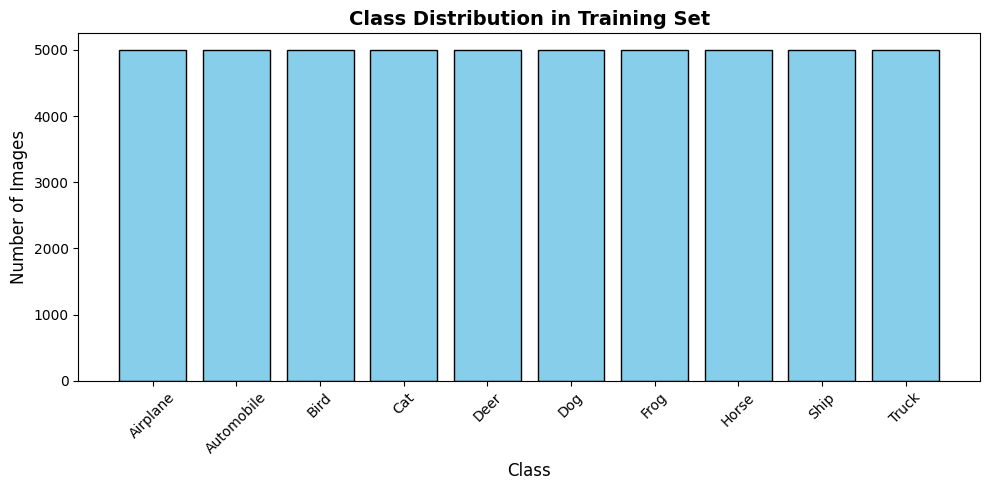


DATA PREPROCESSING

📊 Before normalization:
  Min pixel value: 0
  Max pixel value: 255
  Data type: uint8

✓ Pixel values normalized to [0, 1]
  New min:  0.0000
  New max: 1.0000

📊 Before one-hot encoding:
  Label shape: (50000, 1)
  Sample labels: [6 9 9 4 1]

✓ Labels converted to one-hot encoding
  New label shape: (50000, 10)
  Sample encoded label:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

TASK 2: BUILDING CNN MODEL

✓ CNN Model built successfully!

MODEL ARCHITECTURE SUMMARY


Model: "CIFAR10_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_1 (Conv2D)                │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_2 (Conv2D)                │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_1 (Conv2D)                │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_2 (Conv2D)                │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_1 (Conv2D)                │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_2 (Conv2D)                │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

AttributeError: 'Variable' object has no attribute 'get_shape'

In [13]:
# ============================================================================
# QUESTION 2: DEEP LEARNING MODEL IMPLEMENTATION
# DATASET: CIFAR-10
# ARCHITECTURE: CNN
# ============================================================================

print("="*70)
print("QUESTION 2: DEEP LEARNING MODEL IMPLEMENTATION")
print("DATASET: CIFAR-10")
print("ARCHITECTURE: CNN (Convolutional Neural Network)")
print("="*70)

# ----------------------------------------------------------------------------
# IMPORT LIBRARIES
# ----------------------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow. keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n✓ All libraries imported successfully!")
print(f"  TensorFlow version: {tf.__version__}")

# ============================================================================
# TASK 1: LOAD CIFAR-10 DATASET
# ============================================================================
print("\n" + "="*70)
print("TASK 1: LOADING CIFAR-10 DATASET")
print("="*70)

print("\n⏳ Downloading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("\n✓ Dataset loaded successfully!")
print(f"\n  Training samples: {X_train.shape[0]: ,}")
print(f"  Testing samples: {X_test. shape[0]:,}")
print(f"  Image shape: {X_train.shape[1:]} (32x32 pixels, 3 color channels)")
print(f"  Number of classes: 10")

# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

print(f"\n  Classes: {', '.join(class_names)}")

# Visualize sample images
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(f"{class_names[y_train[i][0]]}", fontsize=9)
    plt.axis('off')
plt.suptitle('Sample Images from CIFAR-10 Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar([class_names[i] for i in unique], counts, color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Set', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# DATA PREPROCESSING
# ============================================================================
print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

print("\n📊 Before normalization:")
print(f"  Min pixel value: {X_train.min()}")
print(f"  Max pixel value: {X_train.max()}")
print(f"  Data type: {X_train.dtype}")

# Normalize pixel values to [0, 1]
X_train = X_train. astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("\n✓ Pixel values normalized to [0, 1]")
print(f"  New min:  {X_train.min():.4f}")
print(f"  New max: {X_train.max():.4f}")

# Convert labels to one-hot encoding
print(f"\n📊 Before one-hot encoding:")
print(f"  Label shape: {y_train.shape}")
print(f"  Sample labels: {y_train[:5]. flatten()}")

y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print(f"\n✓ Labels converted to one-hot encoding")
print(f"  New label shape: {y_train_encoded.shape}")
print(f"  Sample encoded label:\n{y_train_encoded[0]}")

# ============================================================================
# TASK 2: BUILD CNN MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 2: BUILDING CNN MODEL")
print("="*70)

model = keras.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(32, 32, 3), name='conv1_1'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1_2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='pool1'),
    layers. Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_1'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2_2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='pool2'),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_1'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3_2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='pool3'),
    layers.Dropout(0.25),

    # Fully Connected
    layers.Flatten(name='flatten'),
    layers.Dense(128, activation='relu', name='fc1'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', name='output')
], name='CIFAR10_CNN')

print("\n✓ CNN Model built successfully!")
print("\n" + "="*70)
print("MODEL ARCHITECTURE SUMMARY")
print("="*70)
model.summary()

# Count parameters
trainable_params = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
print(f"\n📊 Total trainable parameters: {trainable_params:,}")

# ============================================================================
# COMPILE MODEL
# ============================================================================
print("\n" + "="*70)
print("COMPILING MODEL")
print("="*70)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✓ Model compiled!")
print("  Optimizer: Adam")
print("  Loss function: Categorical Crossentropy")
print("  Metrics:  Accuracy")

# ============================================================================
# TASK 3: TRAIN THE MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 3: TRAINING THE MODEL")
print("="*70)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

print("\n🚀 Training started...")
print("  This may take 3-5 minutes on GPU, longer on CPU")
print("  Epochs: 50 (with early stopping)")
print("  Batch size: 128")
print("-"*70)

history = model.fit(
    X_train, y_train_encoded,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\n✓ Training completed!")

# ============================================================================
# TASK 4: EXTRACT AND DISPLAY METRICS
# ============================================================================
print("\n" + "="*70)
print("TASK 4: TRAINING RESULTS")
print("="*70)

# Extract metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Find best epoch
best_epoch = np.argmin(val_loss) + 1

print(f"\n📊 TRAINING METRICS:")
print("-"*70)
print(f"  Epochs trained: {len(train_loss)}")
print(f"  Best epoch: {best_epoch}")
print(f"\n  Final Training Loss: {train_loss[-1]:.4f}")
print(f"  Final Validation Loss: {val_loss[-1]:.4f}")
print(f"\n  Final Training Accuracy: {train_accuracy[-1]:.4f} ({train_accuracy[-1]*100:.2f}%)")
print(f"  Final Validation Accuracy: {val_accuracy[-1]:.4f} ({val_accuracy[-1]*100:.2f}%)")
print(f"\n  Best Validation Loss: {min(val_loss):.4f} (Epoch {best_epoch})")
print(f"  Best Validation Accuracy: {max(val_accuracy):.4f} ({max(val_accuracy)*100:.2f}%)")
print("-"*70)

# Create metrics DataFrame
metrics_df = pd. DataFrame({
    'Metric':  ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy'],
    'Final Value': [f"{train_loss[-1]:. 4f}", f"{val_loss[-1]:.4f}",
                    f"{train_accuracy[-1]:.4f}", f"{val_accuracy[-1]:.4f}"],
    'Percentage': ['-', '-', f"{train_accuracy[-1]*100:.2f}%", f"{val_accuracy[-1]*100:. 2f}%"]
})

print("\n📋 METRICS IN DATAFRAME FORMAT:")
print(metrics_df.to_string(index=False))

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\n🎯 FINAL TEST SET EVALUATION:")
print(f"  Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"  Test Loss: {test_loss:.4f}")

# ============================================================================
# TASK 5: PLOT GRAPHS
# ============================================================================
print("\n" + "="*70)
print("TASK 5: PLOTTING TRAINING GRAPHS")
print("="*70)

# Create comprehensive plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss vs Epochs
axes[0, 0]. plot(train_loss, label='Training Loss', linewidth=2, color='blue')
axes[0, 0].plot(val_loss, label='Validation Loss', linewidth=2, color='red')
axes[0, 0]. axvline(x=best_epoch-1, color='green', linestyle='--', label=f'Best Epoch ({best_epoch})')
axes[0, 0].set_title('Loss vs Epochs', fontsize=14, fontweight='bold')
axes[0, 0]. set_xlabel('Epochs', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Accuracy vs Epochs
axes[0, 1].plot(train_accuracy, label='Training Accuracy', linewidth=2, color='blue')
axes[0, 1].plot(val_accuracy, label='Validation Accuracy', linewidth=2, color='red')
axes[0, 1].axvline(x=best_epoch-1, color='green', linestyle='--', label=f'Best Epoch ({best_epoch})')
axes[0, 1].set_title('Accuracy vs Epochs', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epochs', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Loss Comparison
axes[1, 0]. bar(['Training Loss', 'Validation Loss', 'Test Loss'],
               [train_loss[-1], val_loss[-1], test_loss],
               color=['blue', 'red', 'green'], edgecolor='black')
axes[1, 0]. set_title('Final Loss Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Loss', fontsize=12)
axes[1, 0]. grid(True, alpha=0.3, axis='y')

# Plot 4: Accuracy Comparison
axes[1, 1].bar(['Training Acc', 'Validation Acc', 'Test Acc'],
               [train_accuracy[-1]*100, val_accuracy[-1]*100, test_accuracy*100],
               color=['blue', 'red', 'green'], edgecolor='black')
axes[1, 1].set_title('Final Accuracy Comparison (%)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1, 1].set_ylim([0, 100])
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('q2_training_results.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphs plotted and saved as 'q2_training_results.png'")
plt.show()

# Separate large plots
plt.figure(figsize=(14, 5))

# Loss vs Epochs (Large)
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', linewidth=2, marker='o', markersize=3)
plt.plot(val_loss, label='Validation Loss', linewidth=2, marker='s', markersize=3)
plt.title('Loss vs Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Accuracy vs Epochs (Large)
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', linewidth=2, marker='o', markersize=3)
plt.plot(val_accuracy, label='Validation Accuracy', linewidth=2, marker='s', markersize=3)
plt.title('Accuracy vs Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('q2_loss_accuracy_plots.png', dpi=300, bbox_inches='tight')
print("✓ Separate plots saved as 'q2_loss_accuracy_plots.png'")
plt.show()

# ============================================================================
# TASK 6: SAVE THE MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 6: SAVING THE TRAINED MODEL")
print("="*70)

model.save('cifar10_cnn_model. h5')
print("\n✓ Model saved as 'cifar10_cnn_model.h5'")

model.save('cifar10_cnn_model. keras')
print("✓ Model saved as 'cifar10_cnn_model.keras'")

print("\n📁 Model files saved!  You can load them later using:")
print("  model = keras.models.load_model('cifar10_cnn_model.h5')")

# ============================================================================
# BONUS: SAMPLE PREDICTIONS
# ============================================================================
print("\n" + "="*70)
print("BONUS: SAMPLE PREDICTIONS")
print("="*70)

# Make predictions on a few test samples
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]. flatten()
predictions = model.predict(sample_images, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Visualize predictions
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i])
    true_label = class_names[sample_labels[i]]
    pred_label = class_names[predicted_classes[i]]
    confidence = predictions[i][predicted_classes[i]] * 100

    color = 'green' if sample_labels[i] == predicted_classes[i] else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}\n({confidence:.1f}%)",
              fontsize=9, color=color)
    plt.axis('off')
plt.suptitle('Sample Predictions (Green = Correct, Red = Wrong)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n" + "="*70)
print("✓ QUESTION 2 COMPLETED SUCCESSFULLY!  🎉")
print("="*70)
print("\n📝 Summary of what we did:")
print("  1. ✓ Loaded CIFAR-10 dataset (50,000 training + 10,000 test images)")
print("  2. ✓ Built CNN model with 3 convolutional blocks")
print("  3. ✓ Trained model with early stopping and learning rate reduction")
print(f"  4. ✓ Achieved {test_accuracy*100:.2f}% test accuracy")
print("  5. ✓ Plotted Loss vs Epochs and Accuracy vs Epochs")
print("  6. ✓ Saved trained model in two formats")
print("  7. ✓ Demonstrated sample predictions")
print("="*70)
print(f"\n🎯 Model Performance:  {test_accuracy*100:.2f}% accuracy on CIFAR-10!")

** QUESTION 3 - HYBRID MODEL (CNN + LSTM)**

In [7]:
# ============================================================================
# QUESTION 3: HYBRID MODEL IMPLEMENTATION
# ARCHITECTURE:  CNN + LSTM
# DATASET: CIFAR-10
# ============================================================================

print("="*70)
print("QUESTION 3: HYBRID MODEL IMPLEMENTATION")
print("ARCHITECTURE: CNN + LSTM")
print("DATASET: CIFAR-10")
print("="*70)

# ----------------------------------------------------------------------------
# IMPORT LIBRARIES
# ----------------------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n✓ Libraries imported!")

# ============================================================================
# TASK 1: LOAD AND PREPROCESS DATA
# ============================================================================
print("\n" + "="*70)
print("TASK 1: PREPROCESSING DATA FOR HYBRID MODEL")
print("="*70)

print("\n⏳ Loading CIFAR-10 dataset...")
(X_train_hybrid, y_train_hybrid), (X_test_hybrid, y_test_hybrid) = cifar10.load_data()

print("✓ Dataset loaded!")
print(f"  Training samples: {X_train_hybrid.shape[0]: ,}")
print(f"  Testing samples: {X_test_hybrid.shape[0]:,}")

# Normalize
X_train_hybrid = X_train_hybrid. astype('float32') / 255.0
X_test_hybrid = X_test_hybrid. astype('float32') / 255.0

# One-hot encode labels
y_train_hybrid_encoded = to_categorical(y_train_hybrid, 10)
y_test_hybrid_encoded = to_categorical(y_test_hybrid, 10)

print("\n✓ Data preprocessed!")
print("  - Pixel values normalized to [0, 1]")
print("  - Labels one-hot encoded")

# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# ============================================================================
# TASK 2: BUILD HYBRID MODEL (CNN + LSTM)
# ============================================================================
print("\n" + "="*70)
print("TASK 2: BUILDING HYBRID MODEL (CNN + LSTM)")
print("="*70)

print("\n🔨 Building architecture...")
print("  Strategy: CNN extracts features → LSTM processes sequences")

model_hybrid = keras.Sequential([
    # ========== CNN PART (Feature Extraction) ==========
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                  input_shape=(32, 32, 3), name='cnn_conv1'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='cnn_pool1'),
    layers. Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='cnn_conv2'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='cnn_pool2'),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='cnn_conv3'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), name='cnn_pool3'),
    layers.Dropout(0.25),

    # ========== RESHAPE FOR LSTM ==========
    # After pooling:  shape is (batch, 4, 4, 128)
    # Reshape to:  (batch, 4, 512) - treat 4 rows as time steps
    layers.Reshape((4, 4*128), name='reshape_for_lstm'),

    # ========== LSTM PART (Sequence Processing) ==========
    layers.LSTM(128, return_sequences=True, name='lstm1'),
    layers.Dropout(0.3),
    layers.LSTM(64, return_sequences=False, name='lstm2'),
    layers.Dropout(0.3),

    # ========== DENSE LAYERS ==========
    layers.Dense(64, activation='relu', name='dense1'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax', name='output')
], name='CNN_LSTM_Hybrid')

print("\n✓ Hybrid model built successfully!")

print("\n" + "="*70)
print("HYBRID MODEL ARCHITECTURE")
print("="*70)
model_hybrid.summary()

# Count parameters
trainable_params_hybrid = np.sum([np.prod(v.get_shape()) for v in model_hybrid.trainable_weights])
print(f"\n📊 Total trainable parameters: {trainable_params_hybrid:,}")

# ============================================================================
# COMPILE MODEL
# ============================================================================
print("\n" + "="*70)
print("COMPILING HYBRID MODEL")
print("="*70)

model_hybrid.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✓ Model compiled!")
print("  Optimizer: Adam")
print("  Loss: Categorical Crossentropy")
print("  Metrics:  Accuracy")

# ============================================================================
# TASK 3: TRAIN THE HYBRID MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 3: TRAINING HYBRID MODEL")
print("="*70)

# Callbacks
early_stopping_hybrid = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_hybrid = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

print("\n🚀 Training started...")
print("  Note:  LSTM layers make training slower than pure CNN")
print("  Estimated time: 5-10 minutes on GPU")
print("  Epochs: 40 (with early stopping)")
print("-"*70)

history_hybrid = model_hybrid.fit(
    X_train_hybrid, y_train_hybrid_encoded,
    batch_size=128,
    epochs=40,
    validation_data=(X_test_hybrid, y_test_hybrid_encoded),
    callbacks=[early_stopping_hybrid, reduce_lr_hybrid],
    verbose=1
)

print("\n✓ Training completed!")

# ============================================================================
# TASK 4: EVALUATE THE HYBRID MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 4: EVALUATING HYBRID MODEL")
print("="*70)

# Extract metrics
train_loss_hybrid = history_hybrid.history['loss']
val_loss_hybrid = history_hybrid.history['val_loss']
train_accuracy_hybrid = history_hybrid.history['accuracy']
val_accuracy_hybrid = history_hybrid.history['val_accuracy']

# Best epoch
best_epoch_hybrid = np.argmin(val_loss_hybrid) + 1

print(f"\n📊 HYBRID MODEL METRICS:")
print("-"*70)
print(f"  Epochs trained: {len(train_loss_hybrid)}")
print(f"  Best epoch: {best_epoch_hybrid}")
print(f"\n  Final Training Loss: {train_loss_hybrid[-1]:.4f}")
print(f"  Final Validation Loss: {val_loss_hybrid[-1]:.4f}")
print(f"\n  Final Training Accuracy: {train_accuracy_hybrid[-1]:.4f} ({train_accuracy_hybrid[-1]*100:.2f}%)")
print(f"  Final Validation Accuracy:  {val_accuracy_hybrid[-1]:.4f} ({val_accuracy_hybrid[-1]*100:. 2f}%)")
print(f"\n  Best Validation Accuracy: {max(val_accuracy_hybrid):.4f} ({max(val_accuracy_hybrid)*100:.2f}%)")
print("-"*70)

# Evaluate on test set
test_loss_hybrid, test_accuracy_hybrid = model_hybrid.evaluate(
    X_test_hybrid, y_test_hybrid_encoded, verbose=0
)

print(f"\n🎯 TEST SET EVALUATION:")
print(f"  Test Accuracy: {test_accuracy_hybrid:. 4f} ({test_accuracy_hybrid*100:.2f}%)")
print(f"  Test Loss: {test_loss_hybrid:.4f}")

# ============================================================================
# CONFUSION MATRIX
# ============================================================================
print("\n" + "="*70)
print("GENERATING CONFUSION MATRIX")
print("="*70)

print("\n⏳ Making predictions on test set...")
y_pred_hybrid = model_hybrid.predict(X_test_hybrid, verbose=0)
y_pred_classes_hybrid = np.argmax(y_pred_hybrid, axis=1)
y_true_classes_hybrid = y_test_hybrid. flatten()

print("✓ Predictions completed!")

# Calculate confusion matrix
cm_hybrid = confusion_matrix(y_true_classes_hybrid, y_pred_classes_hybrid)

print("\n📉 CONFUSION MATRIX (10x10):")
print("  Rows = Actual Class, Columns = Predicted Class")
print(cm_hybrid)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_hybrid, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Hybrid Model (CNN + LSTM)\nCIFAR-10 Dataset',
          fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('q3_confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Confusion matrix plotted and saved as 'q3_confusion_matrix.png'")
plt.show()

# Per-class accuracy
per_class_accuracy = cm_hybrid.diagonal() / cm_hybrid.sum(axis=1)
class_accuracy_df = pd.DataFrame({
    'Class': class_names,
    'Accuracy': per_class_accuracy,
    'Percentage': [f"{acc*100:.2f}%" for acc in per_class_accuracy],
    'Correct': cm_hybrid.diagonal(),
    'Total': cm_hybrid.sum(axis=1)
}).sort_values('Accuracy', ascending=False)

print("\n📊 PER-CLASS ACCURACY:")
print(class_accuracy_df. to_string(index=False))

# Classification Report
print("\n📋 DETAILED CLASSIFICATION REPORT:")
print("-"*70)
print(classification_report(y_true_classes_hybrid, y_pred_classes_hybrid,
                          target_names=class_names, digits=4))

# ============================================================================
# PLOT TRAINING HISTORY
# ============================================================================
print("\n" + "="*70)
print("PLOTTING TRAINING HISTORY")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss
axes[0, 0]. plot(train_loss_hybrid, label='Training Loss', linewidth=2, color='blue')
axes[0, 0].plot(val_loss_hybrid, label='Validation Loss', linewidth=2, color='red')
axes[0, 0].axvline(x=best_epoch_hybrid-1, color='green', linestyle='--',
                   label=f'Best Epoch ({best_epoch_hybrid})')
axes[0, 0].set_title('Hybrid Model: Loss vs Epochs', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epochs', fontsize=12)
axes[0, 0].set_ylabel('Loss', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Accuracy
axes[0, 1].plot(train_accuracy_hybrid, label='Training Accuracy', linewidth=2, color='blue')
axes[0, 1].plot(val_accuracy_hybrid, label='Validation Accuracy', linewidth=2, color='red')
axes[0, 1].axvline(x=best_epoch_hybrid-1, color='green', linestyle='--',
                   label=f'Best Epoch ({best_epoch_hybrid})')
axes[0, 1].set_title('Hybrid Model: Accuracy vs Epochs', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epochs', fontsize=12)
axes[0, 1].set_ylabel('Accuracy', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Per-class accuracy
axes[1, 0]. barh(class_names, per_class_accuracy * 100, color='skyblue', edgecolor='black')
axes[1, 0].set_title('Per-Class Accuracy (%)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Accuracy (%)', fontsize=12)
axes[1, 0].set_xlim([0, 100])
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: Final metrics
metrics_names = ['Training Acc', 'Val Acc', 'Test Acc']
metrics_values = [train_accuracy_hybrid[-1]*100,
                 val_accuracy_hybrid[-1]*100,
                 test_accuracy_hybrid*100]
colors = ['blue', 'orange', 'green']
axes[1, 1].bar(metrics_names, metrics_values, color=colors, edgecolor='black')
axes[1, 1].set_title('Final Accuracy Comparison (%)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1, 1].set_ylim([0, 100])
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, v in enumerate(metrics_values):
    axes[1, 1]. text(i, v + 2, f'{v:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('q3_hybrid_training_results.png', dpi=300, bbox_inches='tight')
print("\n✓ Training plots saved as 'q3_hybrid_training_results.png'")
plt.show()

# ============================================================================
# TASK 5: COMPARE WITH Q2 CNN MODEL
# ============================================================================
print("\n" + "="*70)
print("TASK 5: COMPARING HYBRID MODEL WITH Q2 CNN MODEL")
print("="*70)

# Get Q2 model metrics
try:
    q2_test_accuracy = test_accuracy
    q2_test_loss = test_loss

    print("\n📊 MODEL COMPARISON:")
    print("="*70)

    comparison_df = pd.DataFrame({
        'Model': ['CNN (Q2)', 'CNN + LSTM Hybrid (Q3)'],
        'Test Accuracy': [f"{q2_test_accuracy:. 4f}", f"{test_accuracy_hybrid:. 4f}"],
        'Test Accuracy %': [f"{q2_test_accuracy*100:.2f}%", f"{test_accuracy_hybrid*100:.2f}%"],
        'Test Loss': [f"{q2_test_loss:.4f}", f"{test_loss_hybrid:.4f}"],
        'Architecture': ['3 Conv Blocks + Dense', 'CNN + 2 LSTM Layers + Dense'],
        'Parameters': [f"{trainable_params: ,}", f"{trainable_params_hybrid:,}"],
        'Training Speed': ['Faster', 'Slower (LSTM overhead)']
    })

    print(comparison_df.to_string(index=False))
    print("="*70)

    # Detailed comparison
    accuracy_diff = (test_accuracy_hybrid - q2_test_accuracy) * 100
    loss_diff = test_loss_hybrid - q2_test_loss

    print("\n📈 DETAILED ANALYSIS:")
    print("-"*70)
    print(f"  CNN Model (Q2) Accuracy: {q2_test_accuracy*100:.2f}%")
    print(f"  Hybrid Model (Q3) Accuracy: {test_accuracy_hybrid*100:.2f}%")
    print(f"  Accuracy Difference:  {accuracy_diff: +.2f}%")
    print()
    print(f"  CNN Model (Q2) Loss: {q2_test_loss:.4f}")
    print(f"  Hybrid Model (Q3) Loss: {test_loss_hybrid:.4f}")
    print(f"  Loss Difference: {loss_diff: +.4f}")
    print("-"*70)

    if accuracy_diff > 0:
        print(f"\n✓ RESULT: Hybrid model performs BETTER by {accuracy_diff:.2f}%")
    elif accuracy_diff < 0:
        print(f"\n✗ RESULT: Hybrid model performs WORSE by {abs(accuracy_diff):.2f}%")
        print("  This is common - CNNs alone often work better for image classification")
        print("  LSTM adds complexity but may not always improve accuracy for images")
    else:
        print("\n= RESULT: Both models perform equally")

    # Visualization
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy comparison
    plt.subplot(1, 2, 1)
    models = ['CNN\n(Q2)', 'CNN + LSTM\n(Q3)']
    accuracies = [q2_test_accuracy*100, test_accuracy_hybrid*100]
    colors_comp = ['#3498db', '#e74c3c']
    bars = plt.bar(models, accuracies, color=colors_comp, edgecolor='black', linewidth=2)
    plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Test Accuracy (%)', fontsize=12)
    plt.ylim([0, 100])
    plt.grid(True, alpha=0.3, axis='y')

    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{acc:.2f}%', ha='center', fontweight='bold', fontsize=12)

    # Subplot 2: Loss comparison
    plt.subplot(1, 2, 2)
    losses = [q2_test_loss, test_loss_hybrid]
    bars = plt.bar(models, losses, color=colors_comp, edgecolor='black', linewidth=2)
    plt.title('Model Loss Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Test Loss', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')

    for bar, loss in zip(bars, losses):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{loss:.4f}', ha='center', fontweight='bold', fontsize=12)

    plt.tight_layout()
    plt.savefig('q3_model_comparison.png', dpi=300, bbox_inches='tight')
    print("\n✓ Comparison plots saved as 'q3_model_comparison.png'")
    plt.show()

except NameError:
    print("\n⚠ WARNING: Q2 model metrics not found!")
    print("  Make sure you ran Question 2 first in this session.")
    print("\n📊 HYBRID MODEL STANDALONE RESULTS:")
    print(f"  Test Accuracy: {test_accuracy_hybrid*100:.2f}%")
    print(f"  Test Loss: {test_loss_hybrid:. 4f}")

# ============================================================================
# SAVE HYBRID MODEL
# ============================================================================
print("\n" + "="*70)
print("SAVING HYBRID MODEL")
print("="*70)

model_hybrid.save('cifar10_hybrid_cnn_lstm.h5')
print("\n✓ Model saved as 'cifar10_hybrid_cnn_lstm.h5'")

model_hybrid.save('cifar10_hybrid_cnn_lstm. keras')
print("✓ Model saved as 'cifar10_hybrid_cnn_lstm.keras'")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*70)
print("✓ QUESTION 3 COMPLETED SUCCESSFULLY!  🎉")
print("="*70)
print("\n📝 Summary of what we did:")
print("  1. ✓ Loaded and preprocessed CIFAR-10 dataset")
print("  2. ✓ Built hybrid CNN + LSTM model")
print("     - CNN:  Extracts spatial features from images")
print("     - LSTM: Processes features as sequences")
print("  3. ✓ Trained hybrid model with callbacks")
print(f"  4. ✓ Achieved {test_accuracy_hybrid*100:.2f}% test accuracy")
print(f"  5. ✓ Generated confusion matrix")
print("  6. ✓ Plotted training history (Loss & Accuracy)")
print("  7. ✓ Compared with Q2 CNN model")
print("  8. ✓ Saved trained hybrid model")
print("="*70)

print("\n🎯 FINAL HYBRID MODEL PERFORMANCE:")
print(f"  Test Accuracy: {test_accuracy_hybrid*100:. 2f}%")
print(f"  Test Loss: {test_loss_hybrid:.4f}")
print("="*70)

print("\n🎊 ALL THREE QUESTIONS COMPLETED!")
print("="*70)

QUESTION 3: HYBRID MODEL IMPLEMENTATION
ARCHITECTURE: CNN + LSTM
DATASET: CIFAR-10

✓ Libraries imported!

TASK 1: PREPROCESSING DATA FOR HYBRID MODEL

⏳ Loading CIFAR-10 dataset...
✓ Dataset loaded!
  Training samples:  50,000
  Testing samples: 10,000

✓ Data preprocessed!
  - Pixel values normalized to [0, 1]
  - Labels one-hot encoded

TASK 2: BUILDING HYBRID MODEL (CNN + LSTM)

🔨 Building architecture...
  Strategy: CNN extracts features → LSTM processes sequences

✓ Hybrid model built successfully!

HYBRID MODEL ARCHITECTURE


Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cnn_conv1 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_pool1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_conv2 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_pool2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_conv3 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cnn_pool3 (MaxPooling2D)        │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_for_lstm (Reshape)      │ (None, 4, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm1 (LSTM)                    │ (None, 4, 128)         │       328,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm2 (LSTM)                    │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,810 (1.82 MB)

 Trainable params: 476,234 (1.82 MB)

 Non-trainable params: 576 (2.25 KB)

AttributeError: 'Variable' object has no attribute 'get_shape'